In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def hamilt(ki, alpha, num_plane_waves):
    """
    Calculate the energy bands for a given wave vector and coupling parameter.
    
    Parameters:
    
    ki (array): Wave vectors.
    alpha (float): Coupling parameter.
    num_plane_waves (int): Number of plane waves to consider.
    
    Returns:
    energies (array): Calculated energy bands.
    
    """
    energies = []
    n = np.arange(-(num_plane_waves // 2), num_plane_waves // 2 + 1)
    G = 2 * np.pi * n
    beta = 0

    for k in ki:
        # Cria a matriz quadrada para o Hamiltoniano
        H = np.zeros((num_plane_waves, num_plane_waves))

        for i in range(num_plane_waves):
            # Elementos diagonais: lambda_k-G_n = |k - G_n|^2
            H[i, i] = (k - G[i]) ** 2

            # Elementos fora da diagonal (acoplamentos sucessivos)
            # Acoplamento com G_{n-1}
            if i > 0:
                H[i, i - 1] = alpha
            # Acoplamento com G_{n+1}
            if i < num_plane_waves - 1:
                H[i, i + 1] = alpha

            if i > 1:
                H[i, i - 2] = beta
            if i < num_plane_waves - 2:
                H[i, i + 2] = beta

        # Diagonaliza o Hamiltoniano para encontrar os autovalores (energias)
        # As energias são ordenadas automaticamente em ordem crescente
        eigenvalues = np.linalg.eigvalsh(H)
        energies.append(eigenvalues)

    return np.array(energies)

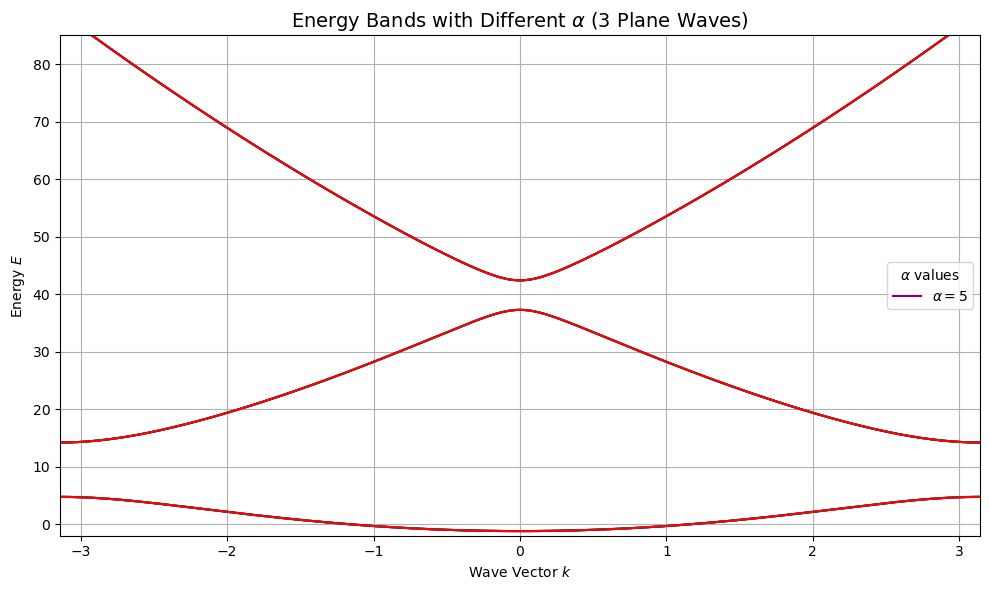

In [36]:
k = np.linspace(- np.pi, np.pi, 500)

plt.figure(figsize=(10, 6))
plt.title('Energy Bands with Different $\\alpha$ (3 Plane Waves)', fontsize=14)
plt.xlabel('Wave Vector $k$')
plt.ylabel('Energy $E$')
plt.xlim(- np.pi, np.pi)
plt.grid(True)

num_plane_waves = 5
alphas = [5]*4
colors = ['purple', 'blue', 'green', 'red']

for idx, alpha in enumerate(alphas):
    band_energies = hamilt(k, alpha, num_plane_waves)
    
    for band_idx in range(band_energies.shape[1]):
        plt.plot(k, band_energies[:, band_idx], color=colors[idx], linestyle='-' if alpha > 0 else '--', label=f'$\\alpha={alpha}$' if band_idx == 0 else "")

handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(dict.fromkeys(labels))
unique_handles = [handles[labels.index(ul)] for ul in unique_labels]
plt.legend(unique_handles, unique_labels, title="$\\alpha$ values")
plt.ylim(-2, 85) 
plt.tight_layout()
plt.show()    